In [1]:
import pandas as pd

from pathlib import Path
from os import chdir

chdir("/Users/shahrez/Documents/Developer/projects/mclaren_applied")

In [2]:
# Load the data from CSV files
club_data = pd.read_csv(Path.cwd() / 'data/club_data.csv')
planet_data = pd.read_csv(Path.cwd() / 'data/planet_data.csv')
training_data = pd.read_csv(Path.cwd() / 'data/training_data.csv')
test_data = pd.read_csv(Path.cwd() / 'data/test_data.csv')


In [3]:
import math

club_data['initial_ball_speed (m/s)'] = 1.5 * club_data['swing_speed (m/s)']
data = training_data.merge(planet_data, on='planet').merge(club_data, on='club')
t_data = test_data.merge(planet_data, on='planet').merge(club_data, on='club')
# Calculate initial ball speed

def projectile_distance(v, g, deg):
    angle_radians = math.radians(deg)
    return (v**2/g)*math.sin(2*angle_radians)

data['loft_angle (rad)'] = data.apply(lambda row: math.radians(row['loft_angle (deg)']), axis=1)
t_data['loft_angle (rad)'] = t_data.apply(lambda row: math.radians(row['loft_angle (deg)']), axis=1)


# X = merged_data.drop(columns=['club', 'planet_data'])
# y = merged_data['club']  

t_data


,planet,club,shot_distance (m),gravity (m/s^2),air_density (kg/m^3),swing_speed (m/s),loft_angle (deg),initial_ball_speed (m/s),loft_angle (rad)
0,Endor,driver,226.5390,8.34,1.20,50,8,75.0,0.139626
1,Haruun Kal,driver,203.7920,9.61,1.28,50,8,75.0,0.139626
2,Bespin,driver,151.4992,14.72,1.37,50,8,75.0,0.139626
3,Endor,3 wood,223.2954,8.34,1.20,48,12,72.0,0.209440
4,Haruun Kal,3 wood,201.4677,9.61,1.28,48,12,72.0,0.209440
5,Bespin,3 wood,152.7555,14.72,1.37,48,12,72.0,0.209440
6,Endor,5 wood,217.5753,8.34,1.20,46,20,69.0,0.349066
7,Haruun Kal,5 wood,197.3655,9.61,1.28,46,20,69.0,0.349066
8,Bespin,5 wood,154.3749,14.72,1.37,46,20,69.0,0.349066
9,Endor,3 iron,209.2289,8.34,1.20,44,21,66.0,0.366519


In [4]:
import math
def calculate_initial_velocity(swing_speed, loft_angle_deg):
    """
    Calculate the initial velocity of a golf ball based on initial ball speed (m/s) and loft angle (degrees).

    Args:
    - initial_ball_speed (float): Initial ball speed in meters per second (m/s).
    - loft_angle_deg (float): Loft angle in degrees.

    Returns:
    - initial_velocity (float): Initial velocity of the golf ball in meters per second (m/s).
    """
    # Convert loft angle from degrees to radians
    loft_angle_rad = math.radians(loft_angle_deg)
    
    # Calculate initial velocity using the provided equation
    initial_velocity = 1.5 * swing_speed * (1 + math.sin(loft_angle_rad))
    
    return initial_velocity

def projectile_distance(v, g, deg):
    angle_radians = math.radians(deg)
    return ((v**2)*math.sin(2*angle_radians))/g

data['initial_velocity'] = data.apply(lambda row: calculate_initial_velocity(row['swing_speed (m/s)'], row['loft_angle (deg)']), axis=1)
t_data['initial_velocity'] = t_data.apply(lambda row: calculate_initial_velocity(row['swing_speed (m/s)'], row['loft_angle (deg)']), axis=1)


data['predicted_distance'] = data.apply(lambda row: projectile_distance(row['swing_speed (m/s)'] * 1.5, row['gravity (m/s^2)'],row['loft_angle (deg)'] ), axis=1)
t_data['predicted_distance'] = t_data.apply(lambda row: projectile_distance(row['swing_speed (m/s)'] * 1.5, row['gravity (m/s^2)'],row['loft_angle (deg)'] ), axis=1)
# Display the updated merged data
t_data

,planet,club,shot_distance (m),gravity (m/s^2),air_density (kg/m^3),swing_speed (m/s),loft_angle (deg),initial_ball_speed (m/s),loft_angle (rad),initial_velocity,predicted_distance
0,Endor,driver,226.5390,8.34,1.20,50,8,75.0,0.139626,85.437983,185.906490
1,Haruun Kal,driver,203.7920,9.61,1.28,50,8,75.0,0.139626,85.437983,161.338203
2,Bespin,driver,151.4992,14.72,1.37,50,8,75.0,0.139626,85.437983,105.330172
3,Endor,3 wood,223.2954,8.34,1.20,48,12,72.0,0.209440,86.969642,252.820475
4,Haruun Kal,3 wood,201.4677,9.61,1.28,48,12,72.0,0.209440,86.969642,219.409236
5,Bespin,3 wood,152.7555,14.72,1.37,48,12,72.0,0.209440,86.969642,143.242035
6,Endor,5 wood,217.5753,8.34,1.20,46,20,69.0,0.349066,92.599390,366.943862
7,Haruun Kal,5 wood,197.3655,9.61,1.28,46,20,69.0,0.349066,92.599390,318.450761
8,Bespin,5 wood,154.3749,14.72,1.37,46,20,69.0,0.349066,92.599390,207.901618
9,Endor,3 iron,209.2289,8.34,1.20,44,21,66.0,0.366519,89.652285,349.488360


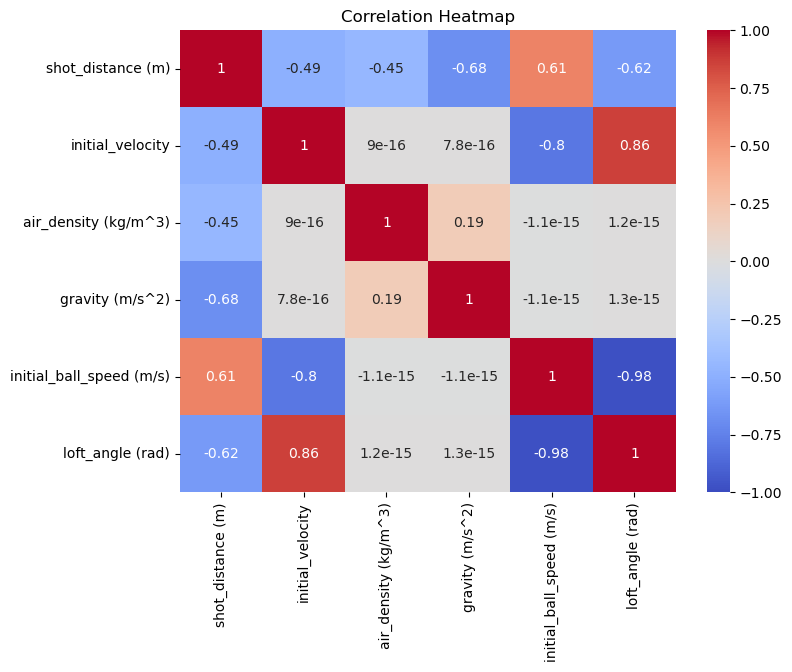

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data[['shot_distance (m)','initial_velocity', 'air_density (kg/m^3)','gravity (m/s^2)', 'initial_ball_speed (m/s)','loft_angle (rad)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
X_test = t_data[['initial_velocity', 'air_density (kg/m^3)','gravity (m/s^2)', 'initial_ball_speed (m/s)','loft_angle (rad)']]
X_train = data[['initial_velocity', 'air_density (kg/m^3)','gravity (m/s^2)', 'initial_ball_speed (m/s)','loft_angle (rad)']]
y_test = t_data['shot_distance (m)']

y_train = data['shot_distance (m)']
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
# model.fit(X_train, y_train)

LinearRegression()

0.9649082897144214 33.81847326183364


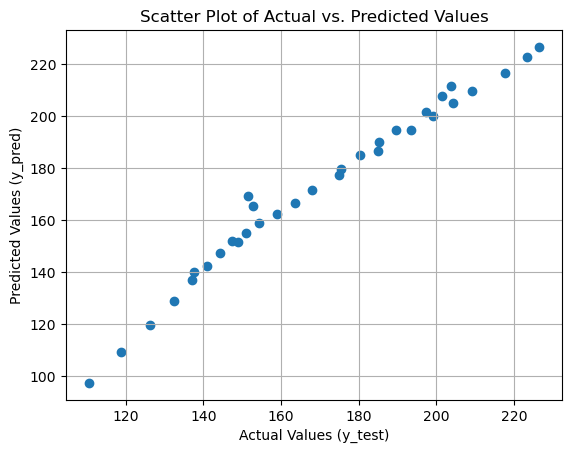

[226.64827276 211.6523613  169.15065078 222.85565456 207.8597431
 165.35803258 216.42147538 201.42556392 158.9238534  209.48625049
 194.49033903 151.98862851 204.97934666 189.9834352  147.48172468
 200.00906904 185.01315758 142.51144706 194.57451683 179.57860537
 137.07689485 186.49688499 171.50097352 128.99926301 177.21622185
 162.22031039 119.71859987 166.7144252  151.71851374 109.21680322
 154.98238729 139.98647583  97.48476531]


In [7]:
from sklearn.metrics import r2_score,mean_squared_error, accuracy_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
model
print(r2, mse)
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.grid(True)
plt.show()
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")

print(y_pred)


In [8]:
count = 0
closest_club = {}
for index, row in t_data.iterrows():
    planet_name = row['planet']
    planet_gravity = row['gravity (m/s^2)']
    planet_air_density = row['air_density (kg/m^3)']
    actual_distance = row['shot_distance (m)']
    actual_club = row['club']
    club = {}
    for index, row in club_data.iterrows():
        club_name = row['club']
        club_speed = row['swing_speed (m/s)'] * 1.5
        club_angle = math.radians(row['loft_angle (deg)'])
        club_velocity = calculate_initial_velocity(row['swing_speed (m/s)'], row['loft_angle (deg)'])
        # 'initial_velocity':[club_velocity], 'air_density (kg/m^3)':[planet_air_density],'gravity (m/s^2)':[planet_gravity], 'initial_ball_speed (m/s)':[club_speed],'loft_angle (rad)':[club_angle]
        df = pd.DataFrame({'initial_velocity':[club_velocity], 'air_density (kg/m^3)':[planet_air_density],'gravity (m/s^2)':[planet_gravity], 'initial_ball_speed (m/s)':[club_speed],'loft_angle (rad)':[club_angle]})
        distance = model.predict(df)
        # print(planet_name, actual_club, club_name, actual_distance - distance[0])
        club[club_name]=abs(actual_distance - distance[0])
    min_key = min(club, key=club.get)
    # print(planet_name,actual_distance,min_key, actual_club)
    if actual_club==min_key:
        count +=1
        
print(count)
    

18
